<a href="https://colab.research.google.com/github/ayushrag1/Stock_Prediction-Using-Facebook-prophet/blob/main/Tesla_Stock_Price_Prediction_using_Facebook_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [6]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

[link text](https:// [link text](https://))

In [7]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization

In [8]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [9]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [10]:
df=pd.read_csv("/content/TSLA.csv")

In [11]:
#read_csv function from pandas

In [12]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-21,624.479980,631.390015,608.880005,620.830017,620.830017,24812700
1,2021-06-22,618.250000,628.570007,615.500000,623.710022,623.710022,19158900
2,2021-06-23,632.000000,657.200012,630.039978,656.570007,656.570007,31099200
3,2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400
4,2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32496700
...,...,...,...,...,...,...,...
247,2022-06-13,669.500000,679.900024,644.049988,647.210022,647.210022,34255800
248,2022-06-14,654.859985,678.989990,635.210022,662.669983,662.669983,32662900
249,2022-06-15,662.750000,706.989990,654.450012,699.000000,699.000000,39710600
250,2022-06-16,668.210022,675.500000,626.080017,639.299988,639.299988,35796900


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,865.965913,886.089164,843.938612,864.829362,864.829362,2.525650e+07
std,162.332990,167.130687,155.142804,161.167165,161.167165,9.030807e+06
min,618.250000,628.570007,608.880005,620.830017,620.830017,9.800600e+06
25%,718.250000,734.000000,704.900009,717.042481,717.042481,1.881828e+07
50%,850.274994,867.815002,823.754975,844.690002,844.690002,2.378030e+07
75%,1007.099991,1034.872467,983.725021,1009.417511,1009.417511,3.015168e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,6.285210e+07


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [16]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [17]:
px.area(df,x="Date",y="Close")

In [18]:
px.line(df,x="Date",y="Close")

In [19]:
px.area(df,x="Date",y="Volume")

In [20]:
px.bar(df,y="Close")

In [21]:
px.box(df,y="Close")

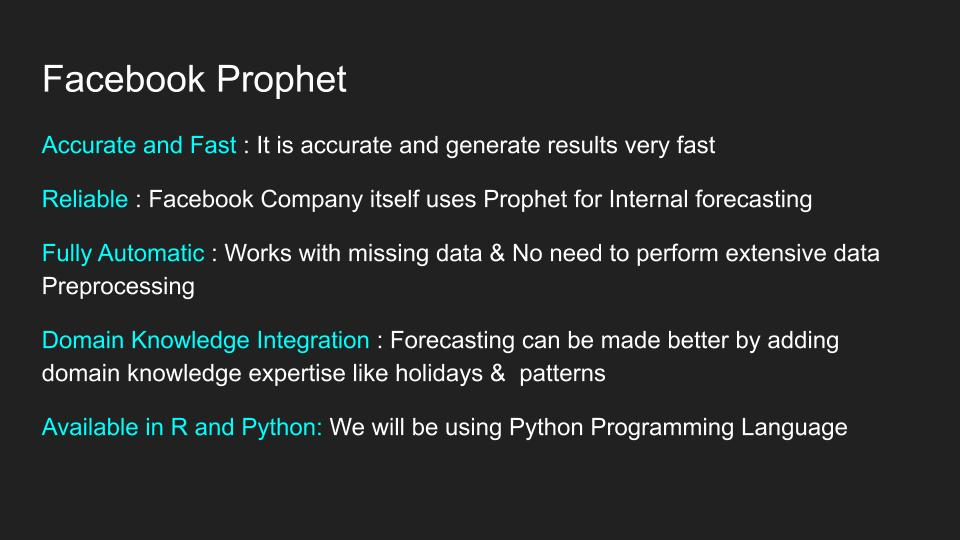

## Data Preperation

In [22]:
columns=['Date','Close']
ndf=pd.DataFrame(df,columns=columns)
ndf

,Date,Close
0,2021-06-21,620.830017
1,2021-06-22,623.710022
2,2021-06-23,656.570007
3,2021-06-24,679.820007
4,2021-06-25,671.869995
...,...,...
247,2022-06-13,647.210022
248,2022-06-14,662.669983
249,2022-06-15,699.000000
250,2022-06-16,639.299988


In [23]:
  prophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})
  prophet_df

,ds,y
0,2021-06-21,620.830017
1,2021-06-22,623.710022
2,2021-06-23,656.570007
3,2021-06-24,679.820007
4,2021-06-25,671.869995
...,...,...
247,2022-06-13,647.210022
248,2022-06-14,662.669983
249,2022-06-15,699.000000
250,2022-06-16,639.299988


In [24]:
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Creating Facebook Prophet Model

##Forecasting

In [25]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [26]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-06-21,593.855830,491.093598,703.440021,593.855830,593.855830,1.808956,1.808956,1.808956,1.808956,1.808956,1.808956,0.0,0.0,0.0,595.664786
1,2021-06-22,596.407893,479.924093,703.297482,596.407893,596.407893,-3.617792,-3.617792,-3.617792,-3.617792,-3.617792,-3.617792,0.0,0.0,0.0,592.790101
2,2021-06-23,598.959957,477.710474,714.262399,598.959957,598.959957,-0.733797,-0.733797,-0.733797,-0.733797,-0.733797,-0.733797,0.0,0.0,0.0,598.226160
3,2021-06-24,601.512020,480.148404,709.905478,601.512020,601.512020,-8.669035,-8.669035,-8.669035,-8.669035,-8.669035,-8.669035,0.0,0.0,0.0,592.842986
4,2021-06-25,604.064084,474.985522,703.424187,604.064084,604.064084,-14.203284,-14.203284,-14.203284,-14.203284,-14.203284,-14.203284,0.0,0.0,0.0,589.860800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2022-07-13,659.646082,541.357598,762.633435,652.609753,667.216993,-0.733797,-0.733797,-0.733797,-0.733797,-0.733797,-0.733797,0.0,0.0,0.0,658.912284
278,2022-07-14,657.110100,531.744308,760.784821,649.546269,665.216754,-8.669035,-8.669035,-8.669035,-8.669035,-8.669035,-8.669035,0.0,0.0,0.0,648.441065
279,2022-07-15,654.574119,528.289352,751.035516,646.404784,663.232219,-14.203284,-14.203284,-14.203284,-14.203284,-14.203284,-14.203284,0.0,0.0,0.0,640.370836
280,2022-07-16,652.038138,551.800180,782.826777,643.512829,660.920049,12.707476,12.707476,12.707476,12.707476,12.707476,12.707476,0.0,0.0,0.0,664.745614


In [27]:
px.line(forecast,x="ds",y="yhat")

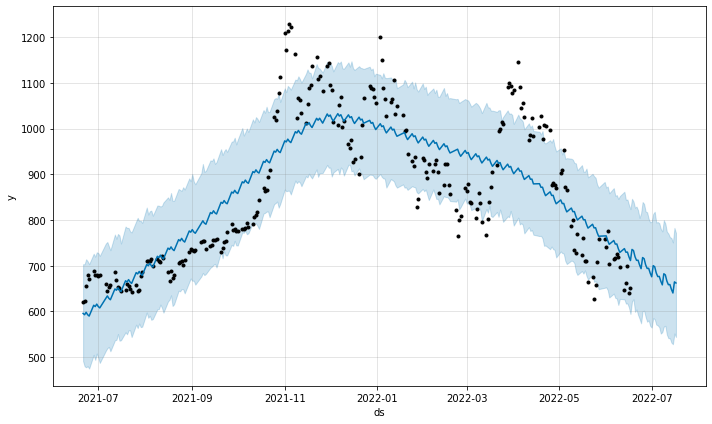

In [28]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

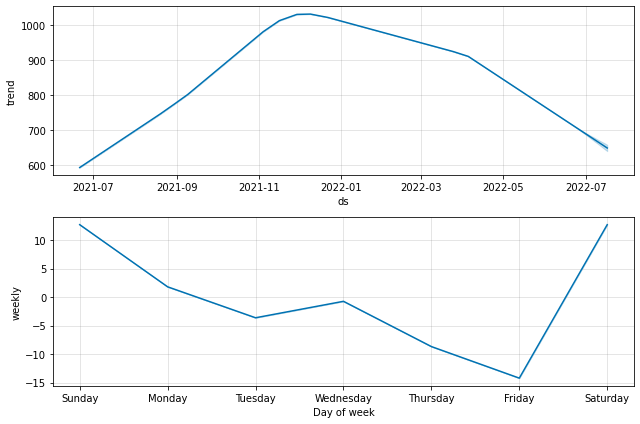

In [29]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [30]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>